In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers.experimental import preprocessing

In [2]:
df1=pd.read_csv('C:/Users/tanma/OneDrive/Desktop/Deep Learning/yellow_tripdata_2020-01.csv')
df1.head()

C:\Users\tanma\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [3]:
df2=pd.read_csv('C:/Users/tanma/OneDrive/Desktop/Deep Learning/export.csv')
df2.head()

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2020-01-01,3.6,1.7,5.0,0.0,0,264.6,17.3,NaN,1008.2,NaN
1,2020-01-02,4.7,0.6,8.9,0.0,0,218.2,12.4,NaN,1013.9,NaN
2,2020-01-03,7.6,6.7,8.3,2.8,0,235.5,8.4,NaN,1010.2,NaN
3,2020-01-04,8.2,6.7,9.4,5.3,0,325.2,5.7,NaN,1003.7,NaN
4,2020-01-05,4.6,2.8,7.2,0.0,0,300.1,8.2,NaN,1010.1,NaN


In [4]:
df1.shape

(6405008, 18)

In [5]:
df1['tpep_pickup_datetime']= pd.to_datetime(df1['tpep_pickup_datetime'])
df1['tpep_dropoff_datetime']= pd.to_datetime(df1['tpep_dropoff_datetime'])

In [6]:
df1['year'] = df1['tpep_pickup_datetime'].dt.year
df1['month'] = df1['tpep_pickup_datetime'].dt.month
df1['day'] = df1['tpep_pickup_datetime'].dt.day


In [7]:
df1['date'] = pd.to_datetime(df1[['year', 'month', 'day']])


In [8]:
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,year,month,day,date
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,...,0.5,1.47,0.0,0.3,11.27,2.5,2020,1,1,2020-01-01
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,...,0.5,1.50,0.0,0.3,12.30,2.5,2020,1,1,2020-01-01
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,...,0.5,1.00,0.0,0.3,10.80,2.5,2020,1,1,2020-01-01
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,...,0.5,1.36,0.0,0.3,8.16,0.0,2020,1,1,2020-01-01
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,...,0.5,0.00,0.0,0.3,4.80,0.0,2020,1,1,2020-01-01


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    31 non-null     object 
 1   tavg    31 non-null     float64
 2   tmin    31 non-null     float64
 3   tmax    31 non-null     float64
 4   prcp    31 non-null     float64
 5   snow    31 non-null     int64  
 6   wdir    31 non-null     float64
 7   wspd    31 non-null     float64
 8   wpgt    0 non-null      float64
 9   pres    31 non-null     float64
 10  tsun    0 non-null      float64
dtypes: float64(9), int64(1), object(1)
memory usage: 2.8+ KB


In [10]:
df2['date']= pd.to_datetime(df2['date'])

In [11]:
df=pd.merge(df1,df2, how='inner', on='date')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,...,3.6,1.7,5.0,0.0,0,264.6,17.3,NaN,1008.2,NaN
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,...,3.6,1.7,5.0,0.0,0,264.6,17.3,NaN,1008.2,NaN
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,...,3.6,1.7,5.0,0.0,0,264.6,17.3,NaN,1008.2,NaN
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,...,3.6,1.7,5.0,0.0,0,264.6,17.3,NaN,1008.2,NaN
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,...,3.6,1.7,5.0,0.0,0,264.6,17.3,NaN,1008.2,NaN


In [12]:
df.shape

(6404796, 32)

In [13]:
df=df.drop('wpgt', 1)
df=df.drop('tsun', 1)

In [14]:
df.isnull().sum()

VendorID                 65441
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          65441
trip_distance                0
RatecodeID               65441
store_and_fwd_flag       65441
PULocationID                 0
DOLocationID                 0
payment_type             65441
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
year                         0
month                        0
day                          0
date                         0
tavg                         0
tmin                         0
tmax                         0
prcp                         0
snow                         0
wdir                         0
wspd                         0
pres                         0
dtype: int64

In [15]:
df.dropna(axis=0, how='any', inplace=True)

In [16]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
year                     0
month                    0
day                      0
date                     0
tavg                     0
tmin                     0
tmax                     0
prcp                     0
snow                     0
wdir                     0
wspd                     0
pres                     0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6339355 entries, 0 to 6402887
Data columns (total 30 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               float64       
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           float64       
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  year                  

In [18]:
df['trip_time_sec']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']
df['trip_time_sec']= df['trip_time_sec'].dt.total_seconds()
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,trip_time_sec
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,...,2020-01-01,3.6,1.7,5.0,0.0,0,264.6,17.3,1008.2,288.0
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,...,2020-01-01,3.6,1.7,5.0,0.0,0,264.6,17.3,1008.2,445.0
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,...,2020-01-01,3.6,1.7,5.0,0.0,0,264.6,17.3,1008.2,371.0
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,...,2020-01-01,3.6,1.7,5.0,0.0,0,264.6,17.3,1008.2,291.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,...,2020-01-01,3.6,1.7,5.0,0.0,0,264.6,17.3,1008.2,138.0


In [19]:
#df['weekday'] = df.tpep_pickup_datetime.dt.weekday_name
df['month'] = df.tpep_pickup_datetime.dt.month
df['weekday_num'] = df.tpep_pickup_datetime.dt.weekday
df['pickup_hour'] = df.tpep_pickup_datetime.dt.hour

In [20]:
#Calculate Speed in km/h for further insights
df['speed'] = (df.trip_distance/(df.trip_time_sec/3600))

In [21]:
df.passenger_count.value_counts()

1.0    4547086
2.0     946395
3.0     250223
5.0     225684
6.0     132133
4.0     123467
0.0     114302
7.0         29
9.0         19
8.0         17
Name: passenger_count, dtype: int64

In [22]:
df['passenger_count'] = df.passenger_count.map(lambda x: 1 if x == 0 else x)
df.passenger_count.value_counts()

1.0    4661388
2.0     946395
3.0     250223
5.0     225684
6.0     132133
4.0     123467
7.0         29
9.0         19
8.0         17
Name: passenger_count, dtype: int64

In [23]:
df = df[df.passenger_count <= 6]
df.passenger_count.value_counts()

1.0    4661388
2.0     946395
3.0     250223
5.0     225684
6.0     132133
4.0     123467
Name: passenger_count, dtype: int64

In [24]:
df = df[df.trip_time_sec <= 86400]

In [25]:
#nyc speed limit is max 104
df = df[df.speed <= 104]

In [26]:
df = df[~((df['trip_distance'] <= 1) & (df['trip_time_sec'] >= 3600))]

In [27]:
df.shape

(6325935, 34)

Text(0.5, 1.0, 'Correlation Heatmap')

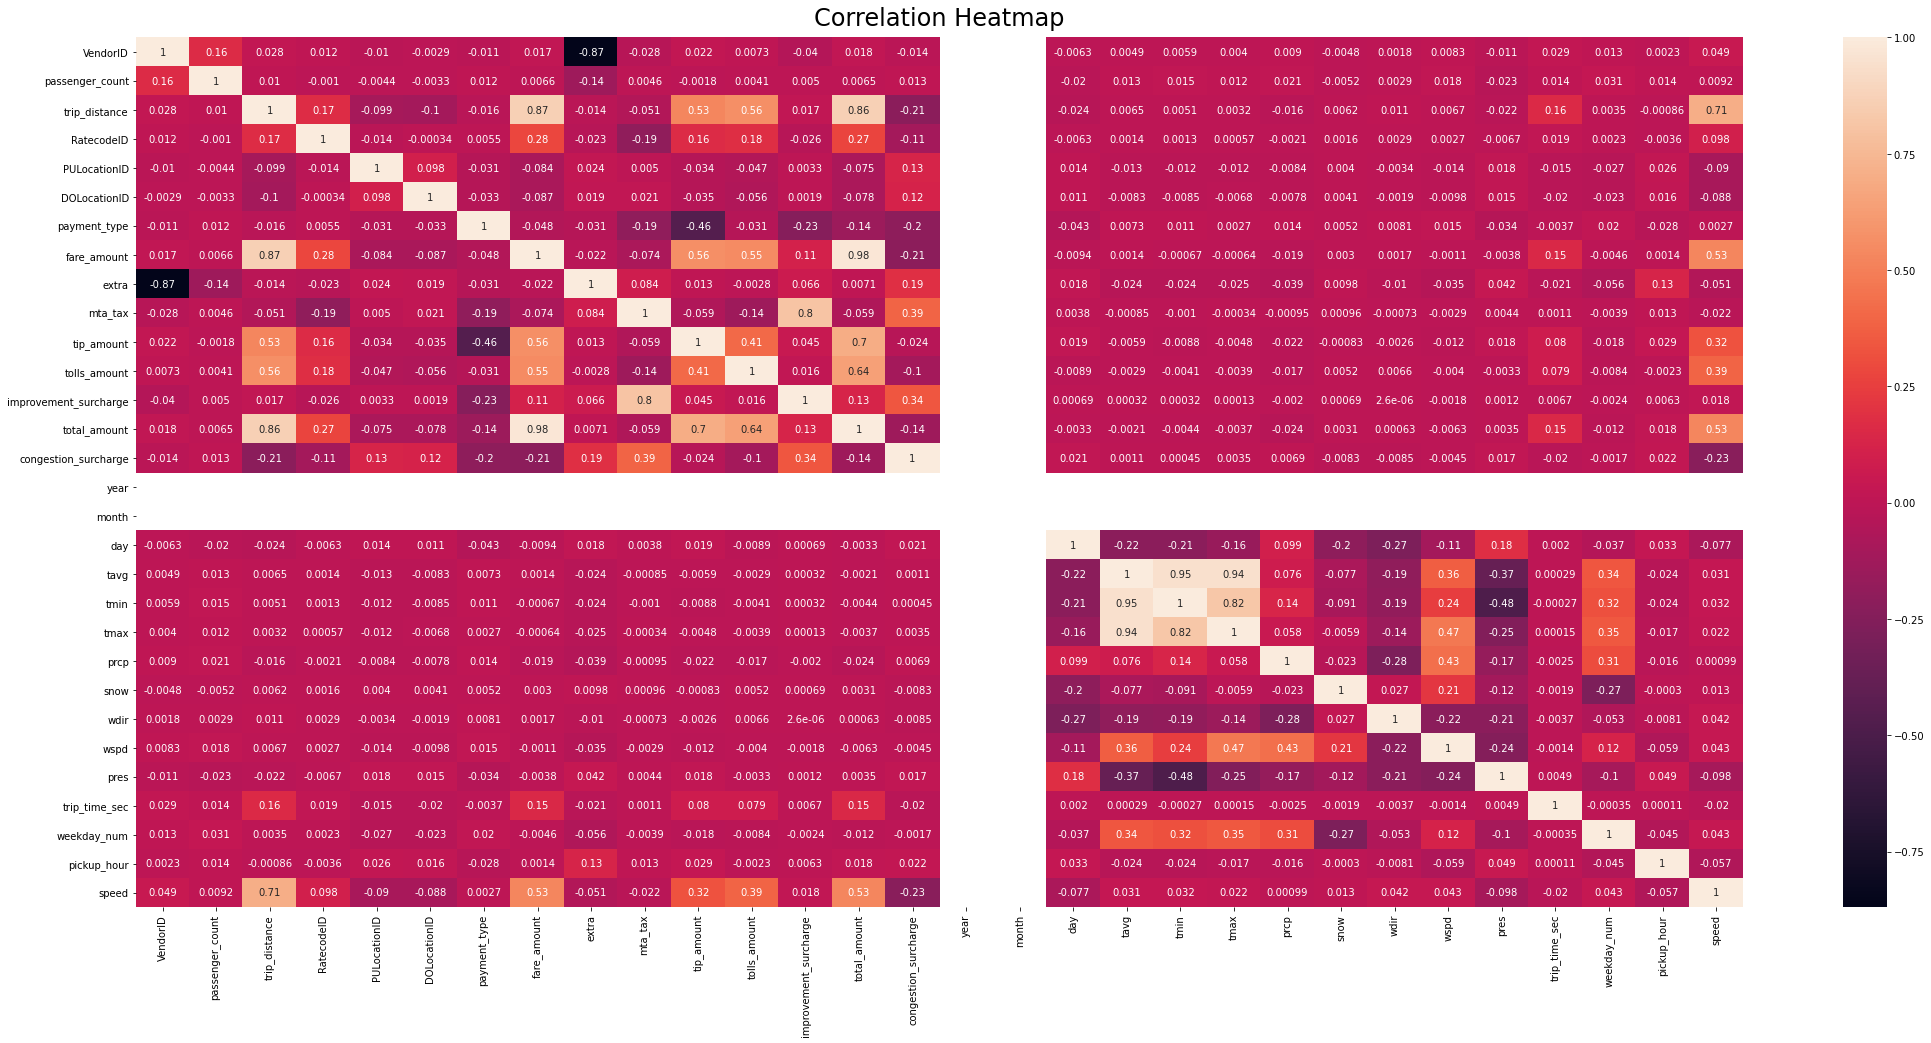

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(36, 16))
heatmap = sns.heatmap(df.corr(), annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':24}, pad=12)

In [29]:
df_num=df.select_dtypes(include=np.number)
df_num.head()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,...,tmax,prcp,snow,wdir,wspd,pres,trip_time_sec,weekday_num,pickup_hour,speed
0,1.0,1.0,1.2,1.0,238,239,1.0,6.0,3.0,0.5,...,5.0,0.0,0,264.6,17.3,1008.2,288.0,2,0,15.000000
1,1.0,1.0,1.2,1.0,239,238,1.0,7.0,3.0,0.5,...,5.0,0.0,0,264.6,17.3,1008.2,445.0,2,0,9.707865
2,1.0,1.0,0.6,1.0,238,238,1.0,6.0,3.0,0.5,...,5.0,0.0,0,264.6,17.3,1008.2,371.0,2,0,5.822102
3,1.0,1.0,0.8,1.0,238,151,1.0,5.5,0.5,0.5,...,5.0,0.0,0,264.6,17.3,1008.2,291.0,2,0,9.896907
4,2.0,1.0,0.0,1.0,193,193,2.0,3.5,0.5,0.5,...,5.0,0.0,0,264.6,17.3,1008.2,138.0,2,0,0.000000


In [30]:
df_num.shape

(6325935, 30)

In [34]:
#df_num=df_num.sample(n = 3339355)

In [31]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6325935 entries, 0 to 6402887
Data columns (total 30 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   passenger_count        float64
 2   trip_distance          float64
 3   RatecodeID             float64
 4   PULocationID           int64  
 5   DOLocationID           int64  
 6   payment_type           float64
 7   fare_amount            float64
 8   extra                  float64
 9   mta_tax                float64
 10  tip_amount             float64
 11  tolls_amount           float64
 12  improvement_surcharge  float64
 13  total_amount           float64
 14  congestion_surcharge   float64
 15  year                   int64  
 16  month                  int64  
 17  day                    int64  
 18  tavg                   float64
 19  tmin                   float64
 20  tmax                   float64
 21  prcp                   float64
 22  snow              

In [32]:
x=df_num.drop('trip_time_sec',1).values
y=df_num['trip_time_sec'].values

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=12)

In [35]:
from sklearn.inspection import permutation_importance
from xgboost import XGBRegressor


In [36]:
xgb = XGBRegressor(n_estimators=100)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='approx', validate_parameters=1, verbosity=None)

In [37]:
xgb.feature_importances_

#f=pd.DataFrame(f, columns=df_num)

array([0.37388787, 0.00326596, 0.34115902, 0.00215202, 0.00443232,
       0.00279323, 0.00430416, 0.07461   , 0.01298124, 0.00063942,
       0.00340362, 0.00118448, 0.05305333, 0.00393413, 0.01265227,
       0.        , 0.        , 0.0038874 , 0.00521933, 0.00360062,
       0.00290995, 0.00457117, 0.00262364, 0.00480246, 0.00488647,
       0.00323196, 0.0033397 , 0.00479566, 0.06167852], dtype=float32)

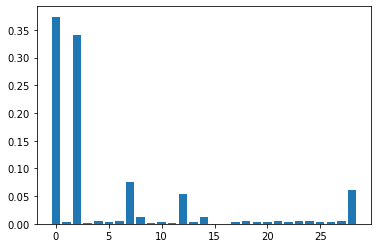

In [38]:
from matplotlib import pyplot
pyplot.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
pyplot.show()

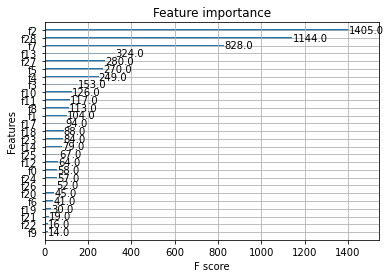

<Figure size 2592x1152 with 0 Axes>

In [39]:
from xgboost import plot_importance
plot_importance(xgb)
plt.figure(figsize=(36, 16))
pyplot.show()

In [40]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6325935 entries, 0 to 6402887
Data columns (total 30 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   passenger_count        float64
 2   trip_distance          float64
 3   RatecodeID             float64
 4   PULocationID           int64  
 5   DOLocationID           int64  
 6   payment_type           float64
 7   fare_amount            float64
 8   extra                  float64
 9   mta_tax                float64
 10  tip_amount             float64
 11  tolls_amount           float64
 12  improvement_surcharge  float64
 13  total_amount           float64
 14  congestion_surcharge   float64
 15  year                   int64  
 16  month                  int64  
 17  day                    int64  
 18  tavg                   float64
 19  tmin                   float64
 20  tmax                   float64
 21  prcp                   float64
 22  snow              

In [41]:
X=df_num[['VendorID','passenger_count','trip_distance','RatecodeID','PULocationID','DOLocationID','speed','total_amount','improvement_surcharge','pickup_hour','tavg','wdir','pres','fare_amount']].values
Y=df_num['trip_time_sec'].values

In [42]:
X.shape

(6325935, 14)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.25, random_state=3)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# first we fit the scaler on the training dataset
scaler.fit(X_train)

# then we call the transform method to scale both the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
#y_train_scaled = scaler.transform(y_train)
#y_test_scaled = scaler.transform(y_test)


In [45]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(280, input_dim=14, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(140, activation='relu'))

# output layer
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])


In [46]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10)


Epoch 1/10
118612/118612 [==============================] - 250s 2ms/step - loss: 5012620.5000 - mae: 156.6276 - val_loss: 1601098.7500 - val_mae: 87.4321
Epoch 2/10
118612/118612 [==============================] - 241s 2ms/step - loss: 2075160.6250 - mae: 92.1525 - val_loss: 1237454.2500 - val_mae: 87.8493
Epoch 3/10
118612/118612 [==============================] - 242s 2ms/step - loss: 1551676.8750 - mae: 91.0321 - val_loss: 1651278.6250 - val_mae: 112.6677
Epoch 4/10
118612/118612 [==============================] - 247s 2ms/step - loss: 924693.0625 - mae: 90.7617 - val_loss: 866305.3750 - val_mae: 76.5732
Epoch 5/10
118612/118612 [==============================] - 250s 2ms/step - loss: 741933.6875 - mae: 88.6399 - val_loss: 656640.9375 - val_mae: 69.7862
Epoch 6/10
118612/118612 [==============================] - 256s 2ms/step - loss: 642653.1250 - mae: 88.6423 - val_loss: 555165.5625 - val_mae: 89.6826
Epoch 7/10
118612/118612 [==============================] - 264s 2ms/step - loss